In [1]:
import pandas as pd
import numpy as np
pd.set_option('max_colwidth',1000)
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer as wnl
import re
stpwrds = set(stopwords.words('english'))
print(len(stpwrds))
stpwrds.discard('not')
print(len(stpwrds))


179
178


In [2]:
df = pd.read_excel(r'C:\BEPEC Python Material\NLP,Naive Baise,SVM\NLP project\1000 leads.xlsx')
df

,Lead Name,Location,Status,Status information,Unnamed: 4
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now",NaN
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification",NaN
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,NaN
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,NaN
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details",NaN
...,...,...,...,...,...
996,vipin,bangalore,Not Converted,25/4/17(Surendra):please send me details tomorrow afternoon 12pm we will discuss 12/5/17(Surendra):not connected 12/5/17(gowtham)not intrsd,NaN
997,dheeraj,chennai,Not Converted,"24/4/17(prema): need CT, but our venue is far. shared details of ds 25/4/17(prema): i want venue near banaswadi",NaN
998,kuldeep singh,bangalore,Not Converted,24/Apr/moHan:intrstd in evng batch trail perd 26/Apr/moHan:alrdy reg in exlr,NaN
999,ankur sharma,bangalore,Not Converted,1/5/17(Surendra):please share me details 11/5/17(gowtham)already done,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Lead Name           1001 non-null   object 
 1   Location            980 non-null    object 
 2   Status              998 non-null    object 
 3   Status information  977 non-null    object 
 4   Unnamed: 4          0 non-null      float64
dtypes: float64(1), object(4)
memory usage: 39.2+ KB


In [4]:
df['Status '].value_counts()

Not Converted    856
Converted        124
NOt Converted     11
Conveted           7
Name: Status , dtype: int64

In [5]:
df['Status '].replace(to_replace=['NOt Converted','Conveted'], value=['Not Converted','Converted '], inplace=True)
df['Status '].value_counts()

Not Converted    867
Converted        131
Name: Status , dtype: int64

In [6]:
df.columns[-1]

'Unnamed: 4'

In [7]:
df.drop(columns={df.columns[-1]}, inplace=True)
df.sample(10)

,Lead Name,Location,Status,Status information
729,Surya,hyderabad,Not Converted,24/MaY/moHan:not reachble 25/MaY/moHan:not reachble 26/MaY/moHan:not reachble 29/MaY/moHan:not reachlbe 30/MaY/moHan:not reachble 31/MaY/moHan:not reachble 1/6/17(gowtham)not rchble 2|AuG|moHan:not reachble
17,sunny,bangalore,Converted,NaN
685,Krishnamohan,hyderabad,Not Converted,31/5/17(prema): rnr 1/6/17(gowtham)RNR 5/6/17(soma):Rnr 6/6/17(soma):RNr 13/6/17(soma):Need Data science and devops 14/6/17(soma):RNR 5/7/17(soma):RNR 13/7/17(soma):he got job in australia so he dropped it
415,Suresh,bangalore,Not Converted,"5/7/17(prema): shared details, will check n revert back 7/7/17(prema): wil try to attend webinar 17/7/17(prema): need a councelling, wil try to atend session 18/7/17(prema): plz cal me @ 7pm 24/7/prema: rnr 25/7/prema:rnr 14/8/prema: cal me @ 5pm"
365,Peter,mumbai,Not Converted,"7/7/17(soma):Rnr,Details shared 10/7/17(soma):he asked to share bank details"
488,Neema Someshwar,pune,Converted,"28/6/17(prema): need to call @ 2pm as she went out 28/6/17(prema): share details, will intimate the timings later 30/6/17(prema):rnr 3/7/17(prema):rnr, shared details on webinar"
238,Ram Sailendra Varma,delhi,Not Converted,19/JulY/moHan:call him evng and rnr 20/JulY/moHan:rnr 20/JulY/moHan:not reachble 25/JulY/moHan:he will come today 26/JulY/moHan:attended demo i will let know nxt mnth 2/AuG/moHan:busy with prjts 10|aUg|moHan:aftr 2 mnths oct endng
951,Surendranath Singh,hyderabad,Not Converted,25/4/17(Surendra):send me details classroom 27/4/17(Surendra):share me payment link 28/4/17(Surendra):RNR 9/5/17(Surendra):busy 9/5/17(Surendra):call disconnected 13/6/17(gowtham)Details shrd 15/6/17(gowtham)call aftr july
620,Kabir,NaN,Not Converted,8/JunE/moHan:not reachble nd frshr check demo on satdy nd decd 12/JunE/moHan:frshr busy with work. will rply to mail for spcl demo 15/JunE/moHan:frshr busy with prjt persnlt meet july
608,Abdul Rashid Khan,India,Converted,10/6/17(gowtham)Not connecting 21/6/17(gowtham)Not cnnctng 20/7/17(soma):calling from Unregistered number


In [8]:
df.dropna(axis=0 , inplace=True)
print(df.shape)
print(df['Status '].value_counts())
df.info()
df.reset_index(drop=True)

(956, 4)
Not Converted    829
Converted        127
Name: Status , dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 956 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Lead Name           956 non-null    object
 1   Location            956 non-null    object
 2   Status              956 non-null    object
 3   Status information  956 non-null    object
dtypes: object(4)
memory usage: 37.3+ KB


,Lead Name,Location,Status,Status information
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now"
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification"
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details"
...,...,...,...,...
951,vipin,bangalore,Not Converted,25/4/17(Surendra):please send me details tomorrow afternoon 12pm we will discuss 12/5/17(Surendra):not connected 12/5/17(gowtham)not intrsd
952,dheeraj,chennai,Not Converted,"24/4/17(prema): need CT, but our venue is far. shared details of ds 25/4/17(prema): i want venue near banaswadi"
953,kuldeep singh,bangalore,Not Converted,24/Apr/moHan:intrstd in evng batch trail perd 26/Apr/moHan:alrdy reg in exlr
954,ankur sharma,bangalore,Not Converted,1/5/17(Surendra):please share me details 11/5/17(gowtham)already done


In [9]:
import string
#stpwrds = set(stopwords.words('english'))
stpwrds.update(['endnan','nan','end','r','im','bt','tmrw'])

def clean_text(text):  
    #no_punctuation = [char for char in text if char not in string.punctuation]
    #print(no_punctuation)
    #no_punctuation1 = ''.join(no_punctuation)
    #print(no_punctuation1)
    text = str(text)
    words = re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", " ", text )  
    pattren = r"[\d]"
    words = re.sub(pattren, '', words)
    words = words.lower()
    final_words =  [wnl().lemmatize(word , pos = 'v') for word in words.split() if word not in stpwrds]
    return(final_words)


In [10]:
df['Clean-status'] = df['Status information'].apply(clean_text)
df.head()

,Lead Name,Location,Status,Status information,Clean-status
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now","[prema, share, detail, available, evng, prema, postpone, plan, train, currently, prema, not, interest]"
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification","[prema, cal, share, detail, email, prema, share, detail, email, check, n, revert, prema, receive, email, look, asq, certification]"
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,"[aug, mohan, rnr]"
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,"[surendra, want, server, aug, mohan, cal, busy, aug, mohan, reg, server]"
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details","[prema, rnr, prema, give, info, say, revert, hr, prema, plan, next, month, share, detail]"


In [11]:
def sent_tokenize(text):
    text = ' '.join(text)
    return(text)
df['clean_sent'] = df['Clean-status'].apply(sent_tokenize)
df.head()

,Lead Name,Location,Status,Status information,Clean-status,clean_sent
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now","[prema, share, detail, available, evng, prema, postpone, plan, train, currently, prema, not, interest]",prema share detail available evng prema postpone plan train currently prema not interest
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification","[prema, cal, share, detail, email, prema, share, detail, email, check, n, revert, prema, receive, email, look, asq, certification]",prema cal share detail email prema share detail email check n revert prema receive email look asq certification
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,"[aug, mohan, rnr]",aug mohan rnr
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,"[surendra, want, server, aug, mohan, cal, busy, aug, mohan, reg, server]",surendra want server aug mohan cal busy aug mohan reg server
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details","[prema, rnr, prema, give, info, say, revert, hr, prema, plan, next, month, share, detail]",prema rnr prema give info say revert hr prema plan next month share detail


In [12]:
print(df.shape)
df.drop_duplicates(subset=['clean_sent'], inplace=True)
print(df.shape)

(956, 6)
(924, 6)


In [13]:
df['Text'] = df['Location']+' '+df['clean_sent']+' '+df['Lead Name']
df.head()

,Lead Name,Location,Status,Status information,Clean-status,clean_sent,Text
0,Raja,hyderabad,Not Converted,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now","[prema, share, detail, available, evng, prema, postpone, plan, train, currently, prema, not, interest]",prema share detail available evng prema postpone plan train currently prema not interest,hyderabad prema share detail available evng prema postpone plan train currently prema not interest Raja
1,Anirudh Reddy,pune,Not Converted,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification","[prema, cal, share, detail, email, prema, share, detail, email, check, n, revert, prema, receive, email, look, asq, certification]",prema cal share detail email prema share detail email check n revert prema receive email look asq certification,pune prema cal share detail email prema share detail email check n revert prema receive email look asq certification Anirudh Reddy
2,Sapna Dewani,bangalore,Converted,16|AuG|moHan:rnr,"[aug, mohan, rnr]",aug mohan rnr,bangalore aug mohan rnr Sapna Dewani
3,suresh,mumbai,Not Converted,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,"[surendra, want, server, aug, mohan, cal, busy, aug, mohan, reg, server]",surendra want server aug mohan cal busy aug mohan reg server,mumbai surendra want server aug mohan cal busy aug mohan reg server suresh
4,Akshay Shinde,hyderabad,Not Converted,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details","[prema, rnr, prema, give, info, say, revert, hr, prema, plan, next, month, share, detail]",prema rnr prema give info say revert hr prema plan next month share detail,hyderabad prema rnr prema give info say revert hr prema plan next month share detail Akshay Shinde


In [14]:
df['Status '].replace(to_replace=['Converted ','Not Converted'], value=[int(1),int(0)], inplace=True)
df['Status '].value_counts()

0    802
1    122
Name: Status , dtype: int64

# TQDM 
Awesome prgress bar utility

In [15]:
import tqdm
from tqdm import tqdm
for i in tqdm(range(10000)):
    pass

100%|███████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 1000788.36it/s]


In [16]:
from time import sleep
text = ""
for char in tqdm(["a", "b", "c", "d"]):
    sleep(0.9)
    text = text + char

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:03<00:00,  1.10it/s]


In [17]:
tqdm.pandas(desc="progress-bar")
df1 = pd.DataFrame(np.random.randint(0, 100, (100000, 6)))
print(df1.shape)
df1.head()


(100000, 6)


,0,1,2,3,4,5
0,70,6,88,14,37,36
1,34,49,36,14,98,58
2,81,41,31,6,73,36
3,97,51,42,63,67,98
4,24,22,49,4,9,74


In [18]:
df1.groupby(0).apply(lambda x : x*2).head()

,0,1,2,3,4,5
0,140,12,176,28,74,72
1,68,98,72,28,196,116
2,162,82,62,12,146,72
3,194,102,84,126,134,196
4,48,44,98,8,18,148


In [19]:
df1.groupby(0).progress_apply(lambda x : x*2).head() # using progress-apply to integerate tqdm with pandas/groupby statement

progress-bar: 100%|█████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 991.75it/s]


,0,1,2,3,4,5
0,140,12,176,28,74,72
1,68,98,72,28,196,116
2,162,82,62,12,146,72
3,194,102,84,126,134,196
4,48,44,98,8,18,148


In [20]:
df[df['Text'].isnull() == False]

,Lead Name,Location,Status,Status information,Clean-status,clean_sent,Text
0,Raja,hyderabad,0,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now","[prema, share, detail, available, evng, prema, postpone, plan, train, currently, prema, not, interest]",prema share detail available evng prema postpone plan train currently prema not interest,hyderabad prema share detail available evng prema postpone plan train currently prema not interest Raja
1,Anirudh Reddy,pune,0,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification","[prema, cal, share, detail, email, prema, share, detail, email, check, n, revert, prema, receive, email, look, asq, certification]",prema cal share detail email prema share detail email check n revert prema receive email look asq certification,pune prema cal share detail email prema share detail email check n revert prema receive email look asq certification Anirudh Reddy
2,Sapna Dewani,bangalore,1,16|AuG|moHan:rnr,"[aug, mohan, rnr]",aug mohan rnr,bangalore aug mohan rnr Sapna Dewani
3,suresh,mumbai,0,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,"[surendra, want, server, aug, mohan, cal, busy, aug, mohan, reg, server]",surendra want server aug mohan cal busy aug mohan reg server,mumbai surendra want server aug mohan cal busy aug mohan reg server suresh
4,Akshay Shinde,hyderabad,0,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details","[prema, rnr, prema, give, info, say, revert, hr, prema, plan, next, month, share, detail]",prema rnr prema give info say revert hr prema plan next month share detail,hyderabad prema rnr prema give info say revert hr prema plan next month share detail Akshay Shinde
...,...,...,...,...,...,...,...
996,vipin,bangalore,0,25/4/17(Surendra):please send me details tomorrow afternoon 12pm we will discuss 12/5/17(Surendra):not connected 12/5/17(gowtham)not intrsd,"[surendra, please, send, detail, tomorrow, afternoon, pm, discuss, surendra, not, connect, gowtham, not, intrsd]",surendra please send detail tomorrow afternoon pm discuss surendra not connect gowtham not intrsd,bangalore surendra please send detail tomorrow afternoon pm discuss surendra not connect gowtham not intrsd vipin
997,dheeraj,chennai,0,"24/4/17(prema): need CT, but our venue is far. shared details of ds 25/4/17(prema): i want venue near banaswadi","[prema, need, ct, venue, far, share, detail, ds, prema, want, venue, near, banaswadi]",prema need ct venue far share detail ds prema want venue near banaswadi,chennai prema need ct venue far share detail ds prema want venue near banaswadi dheeraj
998,kuldeep singh,bangalore,0,24/Apr/moHan:intrstd in evng batch trail perd 26/Apr/moHan:alrdy reg in exlr,"[apr, mohan, intrstd, evng, batch, trail, perd, apr, mohan, alrdy, reg, exlr]",apr mohan intrstd evng batch trail perd apr mohan alrdy reg exlr,bangalore apr mohan intrstd evng batch trail perd apr mohan alrdy reg exlr kuldeep singh
999,ankur sharma,bangalore,0,1/5/17(Surendra):please share me details 11/5/17(gowtham)already done,"[surendra, please, share, detail, gowtham, already, do]",surendra please share detail gowtham already do,bangalore surendra please share detail gowtham already do ankur sharma


In [21]:
df['Clean-status'] = df['Status information'].progress_apply(clean_text)
df.head()

progress-bar: 100%|████████████████████████████████████████████████████████████████| 924/924 [00:00<00:00, 4962.59it/s]


,Lead Name,Location,Status,Status information,Clean-status,clean_sent,Text
0,Raja,hyderabad,0,"14/8/prema: share me details, available in evng 18/8/prema: postponed the plans for training currently 9/11/prema: not interested now","[prema, share, detail, available, evng, prema, postpone, plan, train, currently, prema, not, interest]",prema share detail available evng prema postpone plan train currently prema not interest,hyderabad prema share detail available evng prema postpone plan train currently prema not interest Raja
1,Anirudh Reddy,pune,0,"14/8/prema: cal me tmrw, shared details to email 16/8/prema: share details to email, will check n revert 18/8/prema: received your email, i'm looking for ASQ certification","[prema, cal, share, detail, email, prema, share, detail, email, check, n, revert, prema, receive, email, look, asq, certification]",prema cal share detail email prema share detail email check n revert prema receive email look asq certification,pune prema cal share detail email prema share detail email check n revert prema receive email look asq certification Anirudh Reddy
2,Sapna Dewani,bangalore,1,16|AuG|moHan:rnr,"[aug, mohan, rnr]",aug mohan rnr,bangalore aug mohan rnr Sapna Dewani
3,suresh,mumbai,0,14/8/17(Surendra):i want only Server 16|AuG|moHan:cal busy 17|AuG|moHan:reg for server,"[surendra, want, server, aug, mohan, cal, busy, aug, mohan, reg, server]",surendra want server aug mohan cal busy aug mohan reg server,mumbai surendra want server aug mohan cal busy aug mohan reg server suresh
4,Akshay Shinde,hyderabad,0,"14/8/prema:rnr 16/8/prema: gave info, he said he will revert in 1hr 30/8/prema: planning for next month, share details","[prema, rnr, prema, give, info, say, revert, hr, prema, plan, next, month, share, detail]",prema rnr prema give info say revert hr prema plan next month share detail,hyderabad prema rnr prema give info say revert hr prema plan next month share detail Akshay Shinde


In [22]:
## Labelizing tweets is handy
LabeledSentence = gensim.models.doc2vec.LabeledSentence
LabeledSentence
from gensim.models.doc2vec import TaggedDocument

<IPython.core.display.Javascript object>

In [23]:
from gensim.models import Word2Vec, word2vec
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.model_selection import train_test_split

In [24]:
X_train , X_test , y_train , y_test = train_test_split(df['Text'],df['Status '],test_size = 0.2,random_state = 42,shuffle= True)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(739,)
(185,)
(739,)
(185,)


In [26]:
sentences = []
for i in X_train:
    tokens = i.split(' ')
    l = list(tokens)
    sentences.append(l)
sentences

[['bangalore',
  'surendra',
  'share',
  'link',
  'surendra',
  'get',
  'back',
  'share',
  'office',
  'detail',
  'surendra',
  'rnr',
  'surendra',
  'wrong',
  'number',
  'call',
  'disconnect',
  'number',
  'correct',
  'surendra',
  'wrong',
  'number',
  'iam',
  'not',
  'abdul',
  'Abdul'],
 ['delhi',
  'soma',
  'not',
  'reachable',
  'mail',
  'send',
  'soma',
  'need',
  'month',
  'get',
  'back',
  'us',
  'soma',
  'want',
  'months',
  'Rajesh'],
 ['Hyderabad',
  'prema',
  'ct',
  'weekdays',
  'share',
  'detail',
  'summit',
  'surendra',
  'rnr',
  'prema',
  'share',
  'session',
  'detail',
  'prema',
  'rnr',
  'prema',
  'rnr',
  'prema',
  'rnr',
  'prema',
  'want',
  'ct',
  'ds',
  'ml',
  'dl',
  'k',
  'Samreen'],
 ['bangalore',
  'june',
  'mohan',
  'rnr',
  'june',
  'mohan',
  'rnr',
  'june',
  'mohan',
  'rnr',
  'june',
  'mohan',
  'rnr',
  'june',
  'mohan',
  'rnr',
  'june',
  'mohan',
  'rnr',
  'june',
  'mohan',
  'rnr',
  'july',
  '

In [27]:
## We can also Labelize each document to keep track of it , let's have a look over it
text = ['hey' , 'this' , 'is' , 'Ali']
labelized = []
for i , v in tqdm(enumerate(text)):
    label = '%s_%s'%('dummy' , i)
    print(label)
    labelized.append(LabeledSentence(v,label))
labelized

0it [00:00, ?it/s]<ipython-input-27-f5f22ef00be7>:7: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  labelized.append(LabeledSentence(v,label))
4it [00:00, 4007.94it/s]

dummy_0
dummy_1
dummy_2
dummy_3


[LabeledSentence(words='hey', tags='dummy_0'),
 LabeledSentence(words='this', tags='dummy_1'),
 LabeledSentence(words='is', tags='dummy_2'),
 LabeledSentence(words='Ali', tags='dummy_3')]

In [28]:
def labelize_text(text , label):
    labelized = []
    for i , v in tqdm(enumerate(text)):
        label = '%s_%s'%(label,i)
        labelized.append(LabeledSentence(v,label))
    return labelized

def labelize_text_2(text , label):
    labelized = []
    for i , v in tqdm(enumerate(text)):
        j = int()
        j = i
        label = '%s_%s'%(label,j)
        labelized.append(TaggedDocument(v,label))
    return labelized


In [29]:
x_train = labelize_text(X_train , 'X_train')
x_train

0it [00:00, ?it/s]<ipython-input-28-099f6738cc7d>:5: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  labelized.append(LabeledSentence(v,label))
739it [00:00, 73963.55it/s]


[LabeledSentence(words='bangalore surendra share link surendra get back share office detail surendra rnr surendra wrong number call disconnect number correct surendra wrong number iam not abdul Abdul', tags='X_train_0'),
 LabeledSentence(words='delhi soma not reachable mail send soma need month get back us soma want months Rajesh', tags='X_train_0_1'),
 LabeledSentence(words='Hyderabad prema ct weekdays share detail summit surendra rnr prema share session detail prema rnr prema rnr prema rnr prema want ct ds ml dl k Samreen', tags='X_train_0_1_2'),
 LabeledSentence(words='bangalore june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr july mohan rnr aug mohan rnr Sanath', tags='X_train_0_1_2_3'),
 LabeledSentence(words='hyderabad apr mohan rnr may mohan cal pm may mohan need cls room cmng today demo amit', tags='X_train_0_1_2_3_4'),
 LabeledSentence(words='pune surendra share detail surendra share detail surendra rnr surendra please se

In [30]:
x_train = labelize_text_2(X_train , 'X_train')
x_train

739it [00:00, 147902.40it/s]


[TaggedDocument(words='bangalore surendra share link surendra get back share office detail surendra rnr surendra wrong number call disconnect number correct surendra wrong number iam not abdul Abdul', tags='X_train_0'),
 TaggedDocument(words='delhi soma not reachable mail send soma need month get back us soma want months Rajesh', tags='X_train_0_1'),
 TaggedDocument(words='Hyderabad prema ct weekdays share detail summit surendra rnr prema share session detail prema rnr prema rnr prema rnr prema want ct ds ml dl k Samreen', tags='X_train_0_1_2'),
 TaggedDocument(words='bangalore june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr july mohan rnr aug mohan rnr Sanath', tags='X_train_0_1_2_3'),
 TaggedDocument(words='hyderabad apr mohan rnr may mohan cal pm may mohan need cls room cmng today demo amit', tags='X_train_0_1_2_3_4'),
 TaggedDocument(words='pune surendra share detail surendra share detail surendra rnr surendra please send lin

In [31]:
x_test = labelize_text_2(X_test , 'X_test')
x_test[2]

185it [00:00, 92583.97it/s]


TaggedDocument(words='hyderabad aug mohan cacl latr aug mohan rnr soma ask call tomorrow Jobby Jose', tags='X_test_0_1_2')

In [32]:
model_name = 'word-vec-model'
# Set values for various word2vec parameters
num_features = 300    # Word vector dimensionality                      
min_word_count = 1   # Minimum word count                        
num_workers = 3       # Number of threads to run in parallel
context = 5          # Context window size
downsampling = 1e-3   # Downsample setting for frequent words
negative=5            # For negative sampling

model = word2vec.Word2Vec(sentences, workers=num_workers, \
                size=num_features, min_count = min_word_count, \
                window = context, sample = downsampling, \
                 negative = negative , sg = 1)

# init_sims will make the model much more memory-efficient.
model.init_sims(replace=True)
model.save(model_name)


INFO - 13:18:52: collecting all words and their counts
INFO - 13:18:52: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 13:18:52: collected 1749 word types from a corpus of 13580 raw words and 739 sentences
INFO - 13:18:52: Loading a fresh vocabulary
INFO - 13:18:52: effective_min_count=1 retains 1749 unique words (100% of original 1749, drops 0)
INFO - 13:18:52: effective_min_count=1 leaves 13580 word corpus (100% of original 13580, drops 0)
INFO - 13:18:52: deleting the raw counts dictionary of 1749 items
INFO - 13:18:52: sample=0.001 downsamples 62 most-common words
INFO - 13:18:52: downsampling leaves estimated 7314 word corpus (53.9% of prior 13580)
INFO - 13:18:52: estimated required memory for 1749 words and 300 dimensions: 5072100 bytes
INFO - 13:18:52: resetting layer weights
INFO - 13:18:52: training model with 3 workers on 1749 vocabulary and 300 features, using sg=1 hs=0 sample=0.001 negative=5 window=5
INFO - 13:18:52: worker thread finished; await

In [33]:
print(model.predict_output_word(['prema', 'share', 'detail'], topn=2))
print(model.predict_output_word(['bangalore', 'aug', 'mohan', 'rnr'], topn=2))
print(model.predict_output_word(['soma', 'ask', 'call', 'detail'], topn=2))
print(model.predict_output_word(['detail'], topn=2))


[('cab', 0.0008049001), ('actually', 0.00079226994)]
[('cab', 0.00078606803), ('actually', 0.00077433925)]
[('cab', 0.00080459565), ('actually', 0.00079206575)]
[('cab', 0.0008061823), ('actually', 0.00079350825)]


In [50]:
model['prema']

<ipython-input-50-4b78b13a4ef1>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model['prema']


array([ 0.02738914, -0.13556679, -0.06712386,  0.06589321,  0.08980683,
        0.04414665,  0.08263367, -0.03782423,  0.0572908 , -0.02019576,
       -0.03724601,  0.02581651, -0.07222784,  0.02302289,  0.02555302,
        0.04939604,  0.07994961,  0.08745442, -0.06207664,  0.05730663,
        0.05772198, -0.02273276, -0.03873868,  0.03784075,  0.04760528,
       -0.07680202,  0.08626673,  0.02824727,  0.02394233, -0.07807379,
       -0.08360348,  0.03813763,  0.0199997 ,  0.00741707, -0.04557172,
        0.02044617,  0.05790317, -0.03610234,  0.00038708,  0.05917116,
       -0.02303712,  0.11507969, -0.00564251, -0.05436795, -0.14354059,
        0.03455037, -0.02600125, -0.01821662, -0.04802386, -0.0252011 ,
       -0.15716308,  0.02476016,  0.08343357, -0.05974369,  0.03108873,
       -0.03281312,  0.01395419, -0.13969238,  0.00296121,  0.00957559,
       -0.0240826 , -0.12243875,  0.05612273,  0.01068334, -0.0122618 ,
        0.01791385, -0.14108786, -0.02647757, -0.00190031,  0.01

#  Averaging word vectors using thier weighted average

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer("word", sublinear_tf=True)
tf_idf_matrix = vectorizer.fit(X_train)

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass input=word as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [37]:
print(tf_idf_matrix.vocabulary_)
features = tf_idf_matrix.get_feature_names()


{'bangalore': 174, 'surendra': 1425, 'share': 1294, 'link': 736, 'get': 505, 'back': 162, 'office': 941, 'detail': 363, 'rnr': 1183, 'wrong': 1623, 'number': 928, 'call': 222, 'disconnect': 389, 'correct': 314, 'iam': 579, 'not': 919, 'abdul': 2, 'delhi': 356, 'soma': 1355, 'reachable': 1140, 'mail': 761, 'send': 1270, 'need': 895, 'month': 843, 'us': 1523, 'want': 1577, 'months': 844, 'rajesh': 1104, 'hyderabad': 578, 'prema': 1049, 'ct': 322, 'weekdays': 1588, 'summit': 1415, 'session': 1277, 'ds': 412, 'ml': 824, 'dl': 397, 'samreen': 1225, 'june': 659, 'mohan': 832, 'july': 657, 'aug': 147, 'sanath': 1226, 'apr': 99, 'may': 792, 'cal': 220, 'pm': 1005, 'cls': 269, 'room': 1191, 'cmng': 273, 'today': 1478, 'demo': 357, 'amit': 58, 'pune': 1078, 'please': 1001, 'anup': 89, 'renuka': 1159, 'yrs': 1636, 'exp': 455, 'check': 247, 'try': 1503, 'cnfrm': 276, 'issue': 620, 'mohiuddin': 836, 'khan': 687, 'batch': 182, 'sandhya': 1228, 'om': 945, 'meet': 800, 'later': 719, 'webinar': 1583, '

In [42]:
features

['aasawari',
 'abbas',
 'abdul',
 'abdulrahman',
 'abhijit',
 'abhinav',
 'abhishek',
 'able',
 'abrar',
 'abroad',
 'abt',
 'accept',
 'accordingly',
 'actually',
 'ad',
 'addres',
 'address',
 'aditya',
 'admin',
 'admit',
 'adress',
 'adrs',
 'adusumilli',
 'advaitha',
 'advance',
 'afternoon',
 'afterwardds',
 'afterwards',
 'aftr',
 'aftrnun',
 'agarwal',
 'agencies',
 'agenda',
 'agust',
 'ahmedabad',
 'aim',
 'ajay',
 'ajaya',
 'ajith',
 'akansha',
 'akash',
 'aksah',
 'aksed',
 'akshay',
 'akshaya',
 'alekhya',
 'ali',
 'alrady',
 'alrdy',
 'already',
 'also',
 'amam',
 'amanchi',
 'amar',
 'ambatch',
 'amerpet',
 'ameya',
 'amish',
 'amit',
 'amiya',
 'ammerpet',
 'amol',
 'amt',
 'analysis',
 'analytics',
 'anamika',
 'anand',
 'ananya',
 'anees',
 'aniket',
 'anil',
 'aniruddha',
 'anirudh',
 'anisble',
 'anish',
 'anitha',
 'anjaneyulu',
 'anjani',
 'ankan',
 'ankit',
 'ankita',
 'ankur',
 'ankush',
 'annapoorna',
 'annupriya',
 'anoop',
 'another',
 'anothr',
 'anshul',
 '

In [43]:
dictionary = dict(zip(tf_idf_matrix.get_feature_names() , vectorizer.idf_))
dictionary

{'aasawari': 6.91350300563827,
 'abbas': 6.91350300563827,
 'abdul': 5.997212273764115,
 'abdulrahman': 6.91350300563827,
 'abhijit': 6.91350300563827,
 'abhinav': 6.220355825078324,
 'abhishek': 5.997212273764115,
 'able': 6.91350300563827,
 'abrar': 6.91350300563827,
 'abroad': 6.508037897530106,
 'abt': 5.997212273764115,
 'accept': 6.91350300563827,
 'accordingly': 6.91350300563827,
 'actually': 6.91350300563827,
 'ad': 6.91350300563827,
 'addres': 6.508037897530106,
 'address': 6.220355825078324,
 'aditya': 6.508037897530106,
 'admin': 6.91350300563827,
 'admit': 6.91350300563827,
 'adress': 6.91350300563827,
 'adrs': 6.91350300563827,
 'adusumilli': 6.91350300563827,
 'advaitha': 6.91350300563827,
 'advance': 6.91350300563827,
 'afternoon': 6.220355825078324,
 'afterwardds': 6.91350300563827,
 'afterwards': 6.508037897530106,
 'aftr': 4.5156077328399,
 'aftrnun': 6.91350300563827,
 'agarwal': 6.91350300563827,
 'agencies': 6.91350300563827,
 'agenda': 6.508037897530106,
 'agust':

In [46]:
print("lenght of vocabulary......")
print(len(dictionary))
tf_idf_matrix = tf_idf_matrix.transform(X_train)
print(tf_idf_matrix.shape)

lenght of vocabulary......
1640
(739, 1640)


In [47]:
dictionary['prema']

2.226752832657756

In [54]:
## Now we will be calculating average of vectors for all words and for each document along with multiplying each word with
## it's weighted average

def make_feature_vec(words, model, num_features):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((num_features,),dtype="float32")  # pre-initialize (for speed)
    nwords = 0
    index2word_set = set(model.wv.index2word)  # words known to the model

    for word in words:
        if word in index2word_set: 
            try:
                nwords = nwords + 1.
                feature_vec = np.add(feature_vec,(model[word]*dictionary[word]))
            except KeyError:
                
                continue
    
    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec

def get_avg_feature_vecs(reviews, model, num_features):
    """
    Calculate average feature vectors for all reviews
    """
    counter = 0
    review_feature_vecs = np.zeros((len(reviews),num_features), dtype='float32')  # pre-initialize (for speed)
    
    for review in reviews:
        review_feature_vecs[counter] = make_feature_vec(review, model, num_features)
        counter = counter + 1
    return review_feature_vecs


In [55]:
arr = np.array([1,2,3])
arr2 = np.array([4,5,6])
np.add(arr,(arr2*2))

array([ 9, 12, 15])

In [56]:
sentences = []
for i in X_train:
    tokens = i.split(' ')
    l = list(tokens)
    sentences.append(l)
trainDataVecs = get_avg_feature_vecs(sentences , model , num_features)
print(trainDataVecs.shape)

<ipython-input-54-4d74bcb72b84>:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vec = np.add(feature_vec,(model[word]*dictionary[word]))


(739, 300)


In [73]:
trainDataVecs

array([[ 0.10684936, -0.4574456 , -0.21512191, ...,  0.1060123 ,
        -0.26817915, -0.00205875],
       [ 0.10071968, -0.45932057, -0.20313446, ...,  0.10357037,
        -0.2564582 , -0.01779288],
       [ 0.09262839, -0.38446426, -0.17923433, ...,  0.09441868,
        -0.21796139, -0.01223868],
       ...,
       [ 0.07465686, -0.35097653, -0.16906051, ...,  0.07001531,
        -0.21968138,  0.01796405],
       [ 0.07338724, -0.28684396, -0.13358112, ...,  0.07183795,
        -0.16095959, -0.0107964 ],
       [ 0.14980336, -0.41057667, -0.17115915, ...,  0.12461524,
        -0.16572033, -0.07468888]], dtype=float32)

In [58]:
sentences = []
for i in X_test:
    tokens = i.split(' ')
    l = list(tokens)
    sentences.append(l)
testDataVecs = get_avg_feature_vecs(sentences , model , num_features)
print(testDataVecs.shape)

(185, 300)


<ipython-input-54-4d74bcb72b84>:16: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  feature_vec = np.add(feature_vec,(model[word]*dictionary[word]))


In [59]:
testDataVecs

array([[ 0.13271484, -0.530391  , -0.24138005, ...,  0.13280176,
        -0.29004076, -0.02595181],
       [ 0.09141792, -0.39842224, -0.18935384, ...,  0.08511502,
        -0.2401752 ,  0.01014816],
       [ 0.13322237, -0.42554715, -0.17932026, ...,  0.11415479,
        -0.19224477, -0.05610882],
       ...,
       [ 0.11292677, -0.487067  , -0.22708248, ...,  0.11536508,
        -0.28195447, -0.00306626],
       [ 0.09247053, -0.40487564, -0.19346955, ...,  0.08914007,
        -0.24381997,  0.00911371],
       [ 0.10166182, -0.43477982, -0.20568627, ...,  0.09882034,
        -0.2538052 ,  0.00283279]], dtype=float32)

In [74]:
n_features = trainDataVecs.shape[1]
n_features

300

In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense , BatchNormalization
from tensorflow.keras.optimizers import SGD
tf.config.run_functions_eagerly(True)


In [83]:
ini = tf.keras.initializers.VarianceScaling(
    scale=1.0, mode='fan_in', distribution='truncated_normal',
    seed=None)
model = Sequential()
model.add(BatchNormalization(input_shape=(n_features,)))
model.add(Dense(units=70, activation='elu', kernel_initializer=ini, input_dim=n_features))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=30, activation='elu', kernel_initializer=ini))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=30, activation='elu', kernel_initializer=ini))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=30, activation='elu', kernel_initializer=ini))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=30, activation='elu', kernel_initializer=ini))
#model.add(Dropout(0.2))
BatchNormalization(axis = 1)
model.add(Dense(units=1, activation='sigmoid', kernel_initializer= 'glorot_uniform'))

In [84]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 300)               1200      
_________________________________________________________________
dense_12 (Dense)             (None, 70)                21070     
_________________________________________________________________
dense_13 (Dense)             (None, 30)                2130      
_________________________________________________________________
dense_14 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_15 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_16 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [85]:
opt=  SGD(lr = 0.01 , momentum = 0.9)
model.compile(loss='binary_crossentropy', metrics=['accuracy'] , optimizer = opt)

In [86]:
# fit the model
%time
model_history = model.fit(trainDataVecs, y_train, validation_split = 0.1 ,epochs=100, batch_size=25, verbose=2)

Wall time: 0 ns
Epoch 1/100


C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


27/27 - 1s - loss: 0.4833 - accuracy: 0.7940 - val_loss: 0.3728 - val_accuracy: 0.8784
Epoch 2/100
27/27 - 1s - loss: 0.4111 - accuracy: 0.8617 - val_loss: 0.3732 - val_accuracy: 0.8784
Epoch 3/100
27/27 - 1s - loss: 0.4060 - accuracy: 0.8617 - val_loss: 0.3751 - val_accuracy: 0.8784
Epoch 4/100
27/27 - 1s - loss: 0.4021 - accuracy: 0.8617 - val_loss: 0.3729 - val_accuracy: 0.8784
Epoch 5/100
27/27 - 1s - loss: 0.3992 - accuracy: 0.8617 - val_loss: 0.3746 - val_accuracy: 0.8784
Epoch 6/100
27/27 - 1s - loss: 0.4026 - accuracy: 0.8617 - val_loss: 0.3723 - val_accuracy: 0.8784
Epoch 7/100
27/27 - 1s - loss: 0.4002 - accuracy: 0.8617 - val_loss: 0.3737 - val_accuracy: 0.8784
Epoch 8/100
27/27 - 1s - loss: 0.3970 - accuracy: 0.8617 - val_loss: 0.3752 - val_accuracy: 0.8784
Epoch 9/100
27/27 - 1s - loss: 0.3992 - accuracy: 0.8617 - val_loss: 0.3736 - val_accuracy: 0.8784
Epoch 10/100
27/27 - 1s - loss: 0.3985 - accuracy: 0.8617 - val_loss: 0.3720 - val_accuracy: 0.8784
Epoch 11/100
27/27 - 

Epoch 84/100
27/27 - 1s - loss: 0.3732 - accuracy: 0.8692 - val_loss: 0.3996 - val_accuracy: 0.8784
Epoch 85/100
27/27 - 1s - loss: 0.3814 - accuracy: 0.8647 - val_loss: 0.3707 - val_accuracy: 0.8784
Epoch 86/100
27/27 - 1s - loss: 0.3696 - accuracy: 0.8602 - val_loss: 0.3708 - val_accuracy: 0.8784
Epoch 87/100
27/27 - 1s - loss: 0.3834 - accuracy: 0.8662 - val_loss: 0.3915 - val_accuracy: 0.8784
Epoch 88/100
27/27 - 1s - loss: 0.3838 - accuracy: 0.8677 - val_loss: 0.3822 - val_accuracy: 0.8784
Epoch 89/100
27/27 - 1s - loss: 0.3699 - accuracy: 0.8722 - val_loss: 0.3935 - val_accuracy: 0.8784
Epoch 90/100
27/27 - 1s - loss: 0.3788 - accuracy: 0.8632 - val_loss: 0.3863 - val_accuracy: 0.8784
Epoch 91/100
27/27 - 1s - loss: 0.3822 - accuracy: 0.8602 - val_loss: 0.3932 - val_accuracy: 0.8784
Epoch 92/100
27/27 - 1s - loss: 0.3848 - accuracy: 0.8647 - val_loss: 0.3771 - val_accuracy: 0.8784
Epoch 93/100
27/27 - 1s - loss: 0.3782 - accuracy: 0.8662 - val_loss: 0.3835 - val_accuracy: 0.8784


In [81]:
 for z in tqdm(map(lambda x: x.words, x_train)):
    print(z,"----------------------------------")

483it [00:00, 2989.27it/s]

bangalore surendra share link surendra get back share office detail surendra rnr surendra wrong number call disconnect number correct surendra wrong number iam not abdul Abdul ----------------------------------
delhi soma not reachable mail send soma need month get back us soma want months Rajesh ----------------------------------
Hyderabad prema ct weekdays share detail summit surendra rnr prema share session detail prema rnr prema rnr prema rnr prema want ct ds ml dl k Samreen ----------------------------------
bangalore june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr june mohan rnr july mohan rnr aug mohan rnr Sanath ----------------------------------
hyderabad apr mohan rnr may mohan cal pm may mohan need cls room cmng today demo amit ----------------------------------
pune surendra share detail surendra share detail surendra rnr surendra please send link surendra call u back cal disconnect surendra rnr Anup --------------------------------

739it [00:00, 3075.86it/s]

 ----------------------------------
hyderabad may mohan frshr autamtn eng come demo may mohan attnd today demo Sumit Patil ----------------------------------
hyderabad surendra call pm surendra rnr surendra share link surendra busy surendra iam not interest dont call k Chaithra ----------------------------------
bangalore july mohan need demo wend venkat praveen T ----------------------------------
noida prema rnr prema frnd bro share detail wil check n inform rajesh ----------------------------------
gujarat prema switch prema switch prema switch prema switch share detail email srinivas ----------------------------------
mumbai surendra share link check tomorrow surendra share session link surendra call iam busy surendra rnr surendra may next month surendra call u back within days time sir surendra call tomorrow surendra join next month Saradhi ----------------------------------
Hyderabad surendra dont call iam not interest surendra share detail Debtosh -------------------------------

In [87]:
# evaluate the model
loss, acc = model.evaluate(testDataVecs, y_test, verbose=2)
print('Test Accuracy: %.2f' % (acc*100))
print('loss is : %.2f'%loss)

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


6/6 - 0s - loss: 0.3688 - accuracy: 0.8865
Test Accuracy: 88.65
loss is : 0.37


In [88]:
y_pred = model.predict(testDataVecs)
y_pred = (y_pred > 0.5)
y_pred

C:\Users\Ali\.conda\envs\tensor_ali\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [89]:
y_test.value_counts()

0    164
1     21
Name: Status , dtype: int64

In [90]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , y_pred)
cm

array([[164,   0],
       [ 21,   0]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test , y_pred)
acc

0.8864864864864865

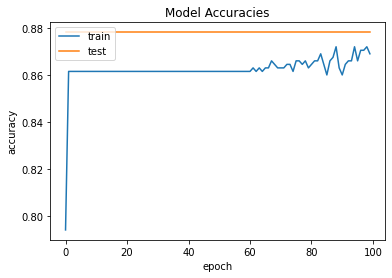

In [92]:
import matplotlib.pyplot as plt
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracies')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

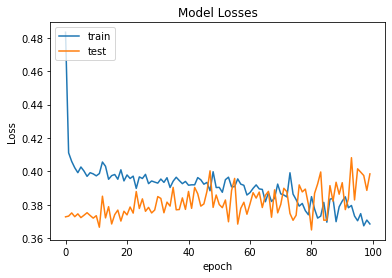

In [93]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Losses')
plt.xlabel('epoch')
plt.ylabel('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()